# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.91'

## Specifying filetype, and folder as before

In [47]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [48]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [49]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

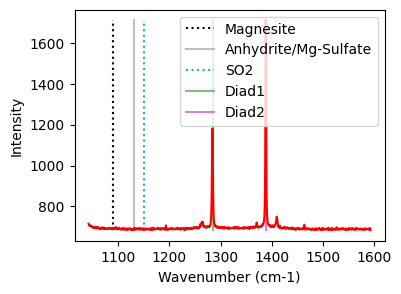

In [50]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [51]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [52]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=489.28184522741617, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

,Diad1_Combofit_Cent,Diad1_Voigt_Cent,Diad1_cent_err,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Voigt_Gamma,Diad1_Combofit_Height,Diad1_Residual,Diad1_Prop_Lor,Diad1_fwhm,Diad1_refit,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad1_PDF_Model
0,1284.001648,1284.001648,0.00877,1512.124926,1.144462,0,493.139038,5.323177,0.637235,2.288924,Flagged Warnings:,1.035821,1.029095,0.081991,0.004642,PseudoVoigtModel


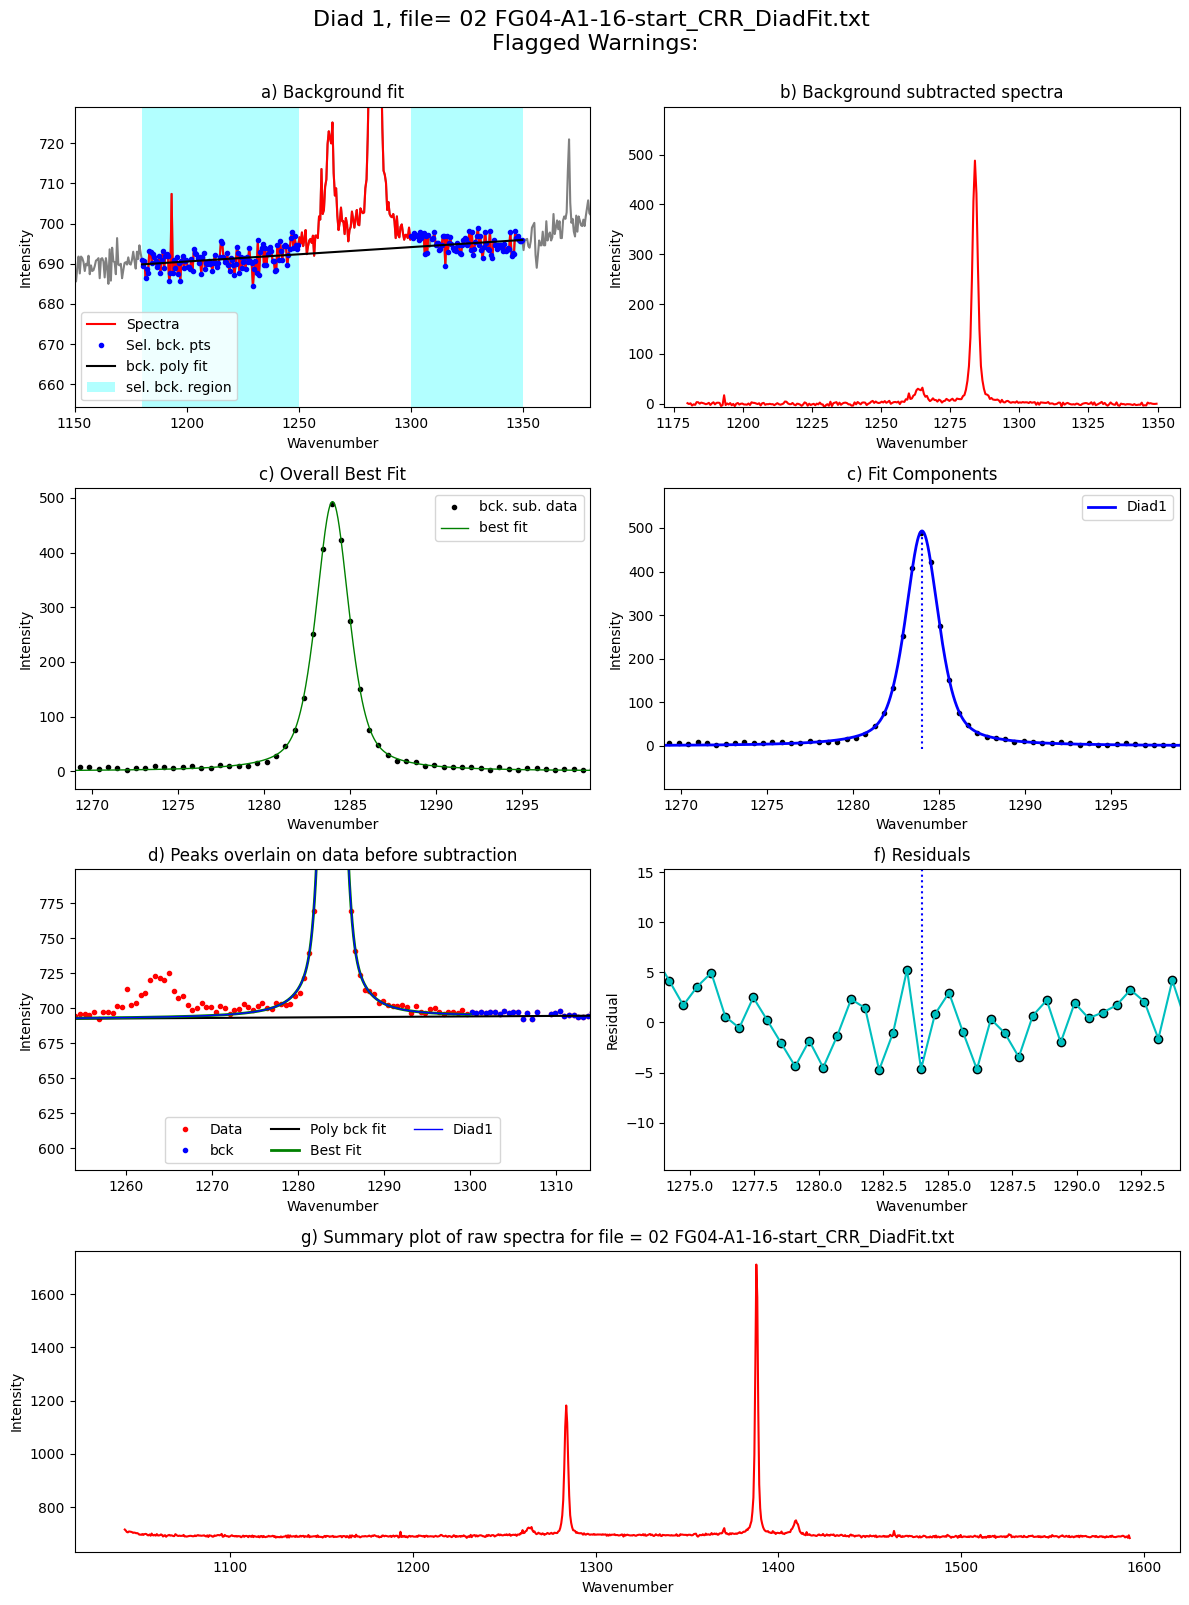

In [53]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [54]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [55]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.4, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1039.7715046131784, HB_prom=60.39039399125363, C13_prom=10, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

,Diad2_Combofit_Cent,Diad2_Voigt_Cent,Diad2_cent_err,Diad2_Voigt_Area,Diad2_Voigt_Sigma,Diad2_Voigt_Gamma,HB2_Cent,HB2_Area,HB2_Sigma,Diad2_Combofit_Height,Diad2_Residual,Diad2_Prop_Lor,Diad2_fwhm,Diad2_refit,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad2_PDF_Model
0,1388.136942,1388.136892,0.002452,2389.176636,0.826467,0,1409.53824,287.112117,1.675577,1052.220277,3.236011,0.699088,1.652935,Flagged Warnings:,1.055785,1.002882,0.092209,0.001571,PseudoVoigtModel


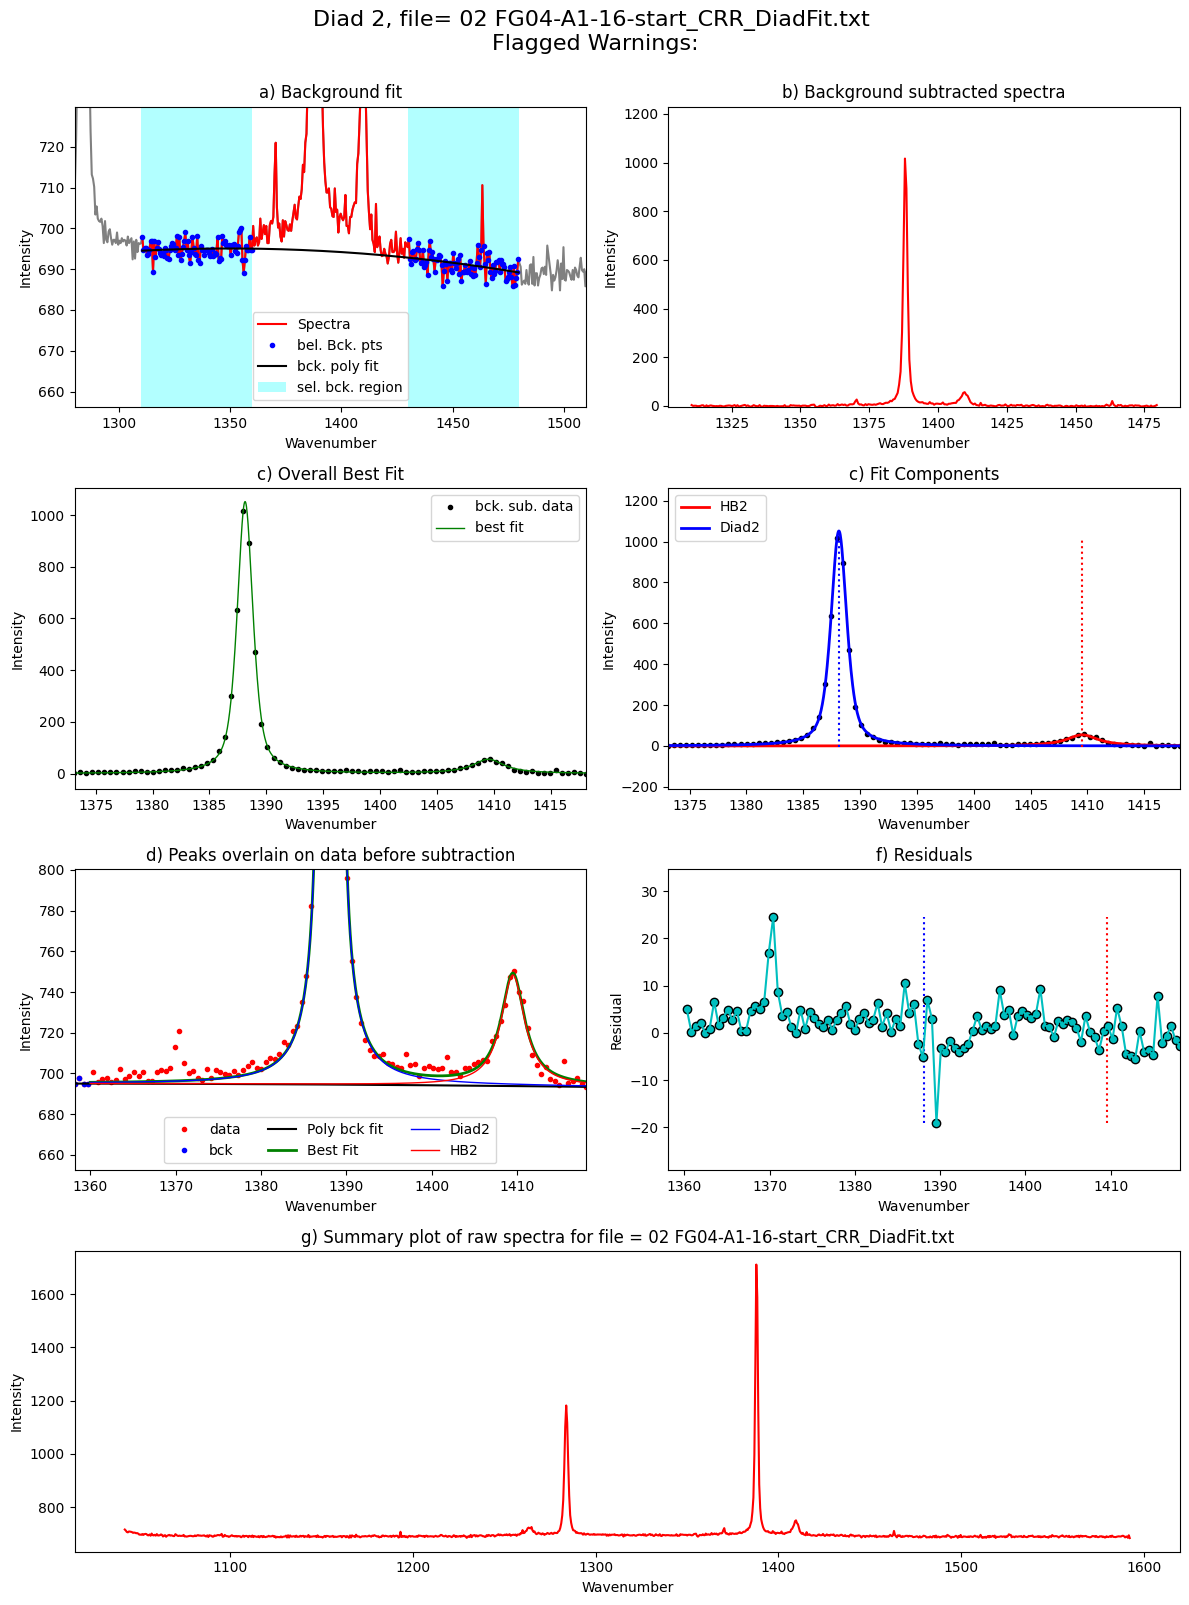

In [56]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

In [58]:
from tqdm import tqdm
plot_figure=False# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


  0%|          | 0/44 [00:00<?, ?it/s]

Processing file: 02 FG04-A1-16-start_CRR_DiadFit.txt


  2%|▏         | 1/44 [00:00<00:18,  2.28it/s]

Processing file: 03 FG04-A1-4-start.txt


  5%|▍         | 2/44 [00:00<00:16,  2.48it/s]

Processing file: 05 919_55_A_CRR_DiadFit.txt


  7%|▋         | 3/44 [00:01<00:30,  1.32it/s]

Processing file: 06 919_55_B_CRR_DiadFit.txt


  9%|▉         | 4/44 [00:02<00:25,  1.55it/s]

Processing file: 07 919_56_A_drift.txt


 11%|█▏        | 5/44 [00:02<00:23,  1.68it/s]

Processing file: 08 919_56_A_CRR_DiadFit.txt


 14%|█▎        | 6/44 [00:03<00:24,  1.57it/s]

Processing file: 13 919_58_A.txt


 16%|█▌        | 7/44 [00:04<00:23,  1.58it/s]

Processing file: 14 919_58_B_CRR_DiadFit.txt


 18%|█▊        | 8/44 [00:05<00:23,  1.53it/s]

Processing file: 15 919_58_C.txt


 23%|██▎       | 10/44 [00:05<00:14,  2.29it/s]

Processing file: 16 919_59_A.txt


 23%|██▎       | 10/44 [00:05<00:14,  2.29it/s]

Processing file: 17 919_60_A_CRR_DiadFit.txt


 25%|██▌       | 11/44 [00:05<00:12,  2.69it/s]

Processing file: 18 919_61_A_meltfilm.txt


 27%|██▋       | 12/44 [00:06<00:12,  2.54it/s]

Processing file: 19 919_61_B_CRR_DiadFit.txt


 30%|██▉       | 13/44 [00:06<00:12,  2.56it/s]

Processing file: 21 919_62_A.txt


 32%|███▏      | 14/44 [00:06<00:11,  2.62it/s]

Processing file: 22 919_63_A.txt


 34%|███▍      | 15/44 [00:07<00:12,  2.26it/s]

Processing file: 23 919_64_A_CRR_DiadFit.txt


 36%|███▋      | 16/44 [00:07<00:11,  2.39it/s]

Processing file: 25 919_67_B_weak.txt


 39%|███▊      | 17/44 [00:08<00:12,  2.08it/s]

Processing file: 27 919_66_A.txt


 41%|████      | 18/44 [00:08<00:11,  2.24it/s]

Processing file: 29 919_66_C.txt


 45%|████▌     | 20/44 [00:09<00:08,  2.96it/s]

Processing file: 30 919_66_D.txt


 45%|████▌     | 20/44 [00:09<00:08,  2.96it/s]

Processing file: 33 919_65_A_rep2_6mW_CRR_DiadFit.txt


 48%|████▊     | 21/44 [00:09<00:08,  2.68it/s]

Processing file: 35 919_68_B.txt


 50%|█████     | 22/44 [00:10<00:07,  2.75it/s]

Processing file: 37 919_69_A.txt


 52%|█████▏    | 23/44 [00:10<00:08,  2.60it/s]

Processing file: 38 919_70_A_CRR_DiadFit.txt


 57%|█████▋    | 25/44 [00:11<00:05,  3.24it/s]

Processing file: 39 KL0919-013-A-rep2-6mW_CRR_DiadFit.txt


 57%|█████▋    | 25/44 [00:11<00:05,  3.24it/s]

Processing file: 40 KL0919-013-B-rep2-6mW.txt


 59%|█████▉    | 26/44 [00:11<00:06,  2.67it/s]

Processing file: 42 K24_33_FIA.txt


 61%|██████▏   | 27/44 [00:12<00:06,  2.60it/s]

Processing file: 43 K24_34_FIA_CRR_DiadFit.txt


 64%|██████▎   | 28/44 [00:12<00:06,  2.63it/s]

Processing file: 44 K24_34_FIB.txt


 66%|██████▌   | 29/44 [00:12<00:05,  2.57it/s]

Processing file: 45 K24_34_FIC.txt


 70%|███████   | 31/44 [00:13<00:04,  3.10it/s]

Processing file: 46 K24_36_FIA.txt


 70%|███████   | 31/44 [00:13<00:04,  3.10it/s]

Processing file: 47 K24_36_FIB_CRR_DiadFit.txt


 73%|███████▎  | 32/44 [00:13<00:03,  3.14it/s]

Processing file: 48 K24_36_FIC.txt


 75%|███████▌  | 33/44 [00:13<00:03,  3.42it/s]

Processing file: 49 K24_36_FID.txt


 80%|███████▉  | 35/44 [00:14<00:02,  4.16it/s]

Processing file: 51 FG04-A1-4-end.txt


 80%|███████▉  | 35/44 [00:14<00:02,  4.16it/s]

Processing file: 52 FG04-A1-16-end.txt


 82%|████████▏ | 36/44 [00:14<00:02,  3.53it/s]

Processing file: 53 K24_37_FIA.txt


 84%|████████▍ | 37/44 [00:15<00:02,  3.07it/s]

Processing file: 54 K24_37_FIB_CRR_DiadFit.txt


 86%|████████▋ | 38/44 [00:15<00:02,  2.66it/s]

Processing file: 55 K24_38_FIA.txt


 89%|████████▊ | 39/44 [00:15<00:01,  2.59it/s]

Processing file: 56 K24_38_FIB.txt


 93%|█████████▎| 41/44 [00:16<00:00,  3.26it/s]

Processing file: 57 K24_39_FIA.txt
Processing file: 58 K24_39_FIB.txt


 95%|█████████▌| 42/44 [00:16<00:00,  3.09it/s]

Processing file: 59 K24_40_FIA_CRR_DiadFit.txt


 98%|█████████▊| 43/44 [00:17<00:00,  3.23it/s]

Processing file: 60 K24_40_FIB.txt


100%|██████████| 44/44 [00:17<00:00,  2.51it/s]


In [59]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [60]:
combo

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,FG04-A1-16-start_CRR_DiadFit,104.135245,0.009106,1284.001648,0.008770,493.139038,1284.001648,1512.124926,1.144462,5.323177,...,1.035821,1.029095,0.081991,0.004642,1.055785,1.002882,0.092209,0.001571,PseudoVoigtModel,PseudoVoigtModel
1,FG04-A1-4-start,104.565051,0.007363,1283.074215,0.007002,647.240115,1283.074215,1826.543342,0.981600,6.318512,...,1.055749,1.080605,0.109447,0.003033,1.006135,1.038905,0.010036,0.001258,PseudoVoigtModel,PseudoVoigtModel
2,919_55_A_CRR_DiadFit,103.172162,0.008526,1286.220958,0.007945,407.803008,1286.221008,653.358969,0.563917,4.930775,...,1.131902,1.099119,0.148763,0.002766,1.246429,1.263158,0.230341,0.001344,PseudoVoigtModel,PseudoVoigtModel
3,919_55_B_CRR_DiadFit,103.185419,0.003859,1286.193200,0.003501,609.390266,1286.193250,883.973640,0.550277,3.001334,...,1.108280,1.094037,0.119168,0.001806,1.216495,1.215426,0.206144,0.000885,PseudoVoigtModel,PseudoVoigtModel
4,919_56_A_drift,103.612090,0.004863,1285.140945,0.004341,936.910518,1285.140995,2196.341459,0.864942,5.375435,...,1.150313,1.200617,0.260024,0.001846,1.049628,1.083955,0.065995,0.000709,PseudoVoigtModel,PseudoVoigtModel
5,919_56_A_CRR_DiadFit,103.631660,0.005114,1285.108566,0.004618,1205.846427,1285.108616,2852.563908,0.858368,7.381420,...,1.081136,1.158850,0.139289,0.001424,1.019753,1.068646,0.026115,0.000563,PseudoVoigtModel,PseudoVoigtModel
6,919_58_A,103.612669,0.007421,1285.128888,0.006783,397.613306,1285.128938,924.466142,0.852629,3.315335,...,1.168803,1.231629,0.287853,0.004289,1.019753,1.061338,0.026207,0.001737,PseudoVoigtModel,PseudoVoigtModel
7,919_58_B_CRR_DiadFit,103.589844,0.005099,1285.191109,0.004481,596.134746,1285.191159,1372.182347,0.850547,3.227752,...,1.016064,1.108824,0.027327,0.002854,1.145503,1.174257,0.189519,0.001104,PseudoVoigtModel,PseudoVoigtModel
8,919_58_C,103.576981,0.010892,1285.275341,0.010000,231.586679,1285.275341,501.063545,0.808107,2.582992,...,1.012500,1.002985,0.020203,0.006979,1.283988,1.293598,0.337013,0.002534,PseudoVoigtModel,PseudoVoigtModel
9,919_59_A,103.166058,0.010585,1286.230017,0.008759,173.966322,1286.230017,242.747223,0.555491,1.799419,...,1.162420,1.152225,0.180446,0.006386,1.236749,1.245902,0.223804,0.003002,PseudoVoigtModel,PseudoVoigtModel


### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [61]:
# !pip install winotify

from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3b_Secondary_Peaks is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()